In [1]:
from fit_param import test
import matplotlib.pyplot as plt
import numpy as np

In [2]:
param_fits = test([0.1, 29000], cores=1, repeat=3, plot=False, average_dir = '.', delete_if_exists=False)
# np.savetxt("param_fits.txt", param_fits)

param_true = [0.1, 29000]
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 29000.0 m/s.
---------------------------------------------


Existing averaged dTb and z are loaded for m_chi = 0.11000000000000001 GeV and V_rms = 29000.0 m/s.
---------------------------------------------
Existing averaged dTb and z are loaded for m_chi = 0.1 GeV and V_rms = 31900.0 m/s.
---------------------------------------------
10 random v_streams will be generated for m_chi = 0.10452705818703313 GeV and V_rms = 27925.67269486427 m/s...
1 CPU working...
It costs 117.43 seconds to calculate dTb of 10 different initial_v_streams by 1 CPU(s).
---------------------------------------------
10 random v_streams will be generated for m_chi = 0.10188457234464737 GeV and V_rms = 28731.4181808653 m/s...
1 CPU working...
It costs 129.92 seconds to calculate dTb of 10 different initial_v_streams by 1 CPU(s).
---------------------------------------------
10 random v_streams will be generated for m_chi = 0.10122395084062137 GeV and V_rms = 28932.854561286975 m/s...
1 CPU working...
It costs 121.67 seconds to calculate dTb of 10 different initial_v_strea

In [ ]:
# param_fits = np.loadtxt('m_chi0.10_V_rms29000_12:23:27.txt')
param_fits = np.load("m_chi{}_V_rms{}.npy", mmap_mode='r')
print(param_fits)

m_chi_fit, V_rms_fit = param_fits.T

plt.figure(dpi=150)
plt.hist2d(m_chi_fit, V_rms_fit, density=True)
plt.colorbar()
plt.plot(0.05, 29000, marker='*', c='r', label=r"$m_{\chi, \rm real} = $")
plt.title(r"distribution of fitting values for $m_{\chi}$ and $V_{\rm rms}$")
plt.xlabel("dark matter mass [GeV]")
plt.ylabel("r.m.s. of stream velocity [m/s]")
plt.legend()
# plt.xlim(0,0.5)
# plt.ylim(25000, 32500)
plt.savefig("hist2d")
plt.show()

[1.0e-01 2.9e+04 1.0e-01 2.9e+04 1.0e-01 2.9e+04 1.0e-01 2.9e+04 1.0e-01
 2.9e+04]


ValueError: too many values to unpack (expected 2)

In [ ]:
ls /storage/home/hcoda1/3/bxia34/scratch

In [ ]:
ls /storage/home/hcoda1/3/bxia34/scratch/average_dTb/V_rms29531/m_chi0.06

ls: cannot access /storage/home/hcoda1/3/bxia34/scratch/average_dTb/V_rms29531/m_chi0.06: No such file or directory


# 降低V_rms的分辨率
# 单独输出每次预测点的坐标，添加是否更新文件的参数

In [ ]:
from average_dTb import average_dTb

In [ ]:
ls average_dTb/V_rms29000/m_chi0.10/ | wc -l

2000


In [ ]:
from fit_param import demonstrate

In [ ]:
pwd

'/storage/scratch1/3/bxia34/ares'

file_names[:5] = ['15669.832.npy', '28177.050.npy', '29451.132.npy', '51915.425.npy', '17129.208.npy']
After shuffling, file_names[:5] = ['12810.599.npy', '26454.195.npy', '21972.103.npy', '34108.658.npy', '10689.788.npy']


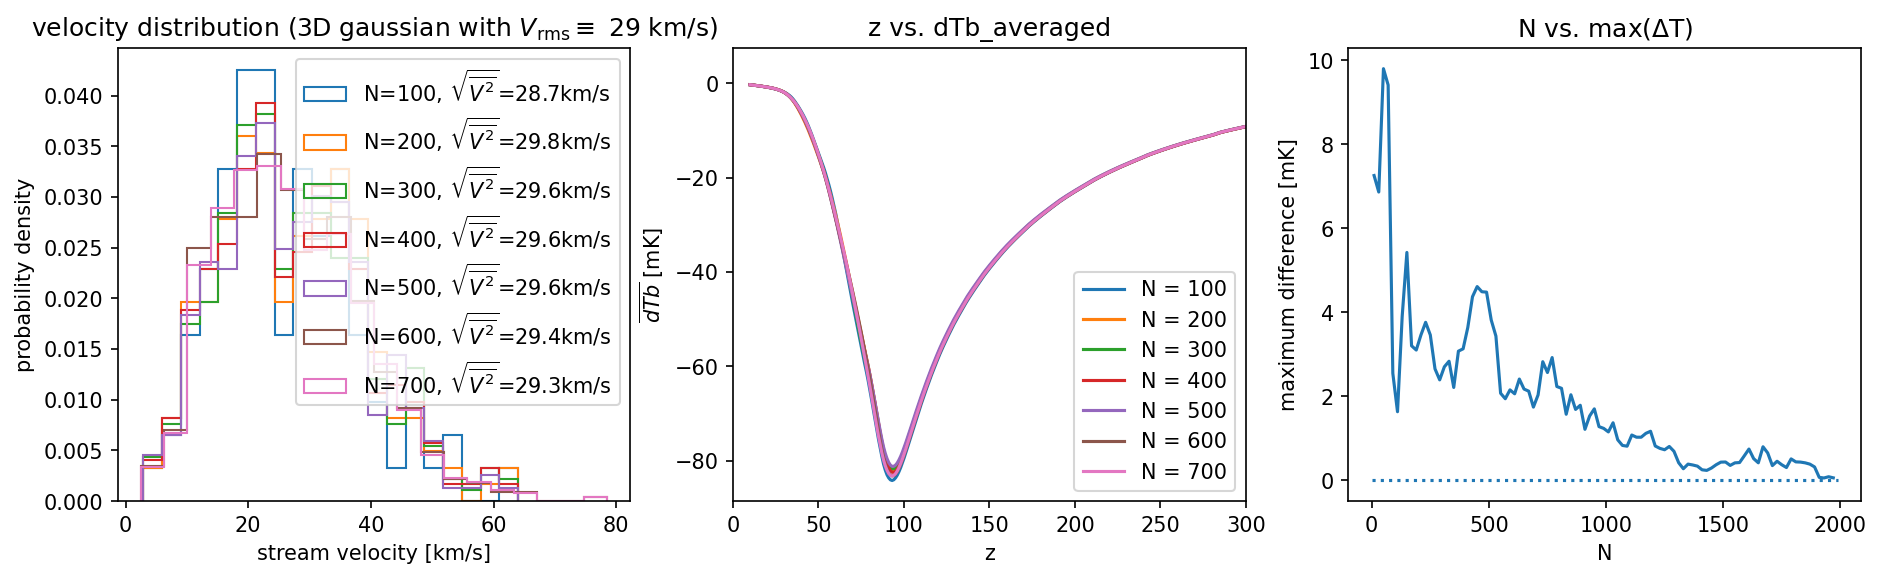

In [ ]:
demonstrate()

In [ ]:
data = np.random.normal(size=500)

In [ ]:
N_max = 500
def average_data(data, N=np.arange(1,N_max,1)):
    averaged_data = [np.average(data[:n]) for n in N]
    plt.plot(averaged_data, c='r')
    plt.scatter(np.arange(0,np.size(data)), data, s=1, c='k')
    plt.xlabel("N")
    plt.ylabel("averaged_data")
    plt.axhline(y=0, xmin=0, xmax=1)
    plt.show()

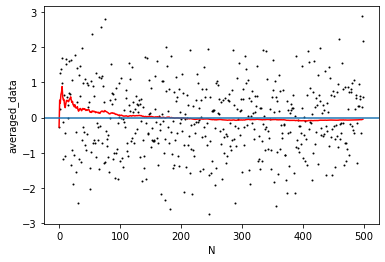

In [ ]:
average_data(data[:N_max])

In [ ]:
from average_dTb import average_dTb
V_rms_list = [29000-10,29000+10]
for V_rms in V_rms_list:
    print("working on", V_rms)
    average_dTb(m_chi=0.10, V_rms=V_rms, cores=-1, more_random_v_streams=200, verbose=False)

working on 28990
24 CPUs working in parallel...
It costs 156.21 seconds to calculate dTb of 300 different initial_v_streams by 24 CPU(s).
---------------------------------------------
working on 29010
24 CPUs working in parallel...
It costs 154.57 seconds to calculate dTb of 300 different initial_v_streams by 24 CPU(s).
---------------------------------------------


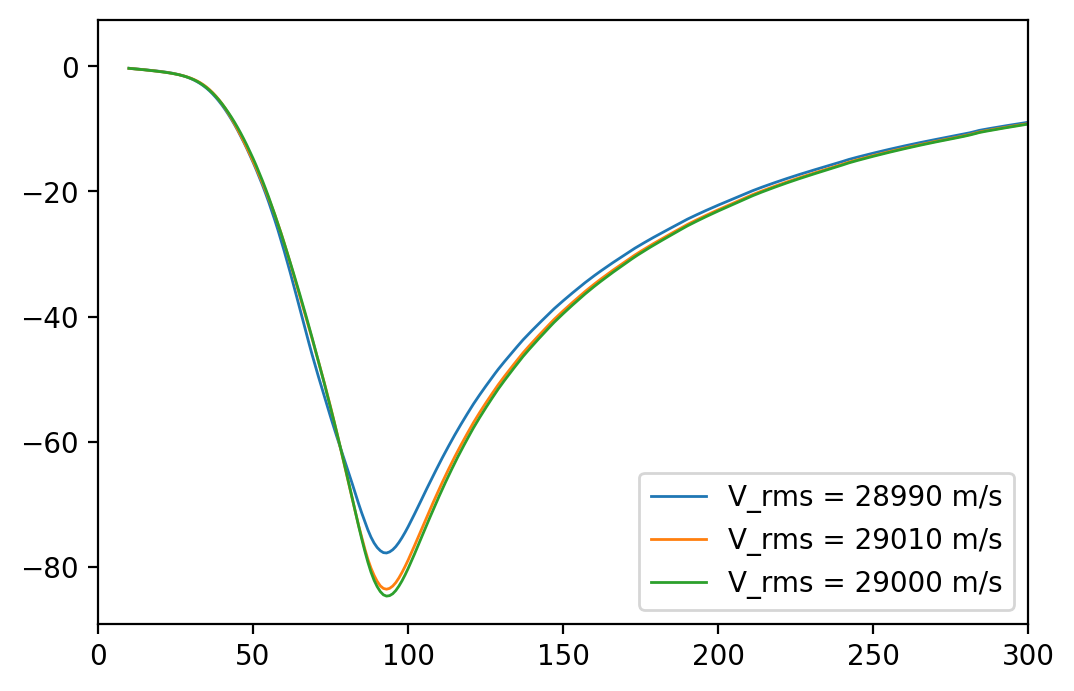

In [ ]:
# V_rms_list = [28900, 29000, 29100]
V_rms_list.append(29000)
data = np.array([np.load("average_dTb/V_rms{}/m_chi0.10_averaged.npy".format(V_rms)) for V_rms in V_rms_list])

plt.figure(dpi=200)
for i in np.arange(data.shape[0]):
    plt.plot(data[i][0], data[i][1], label="V_rms = {} m/s".format(V_rms_list[i]), linewidth=1)
# plt.xlim(50,200)
plt.xlim(0,300)
plt.legend()
plt.show()

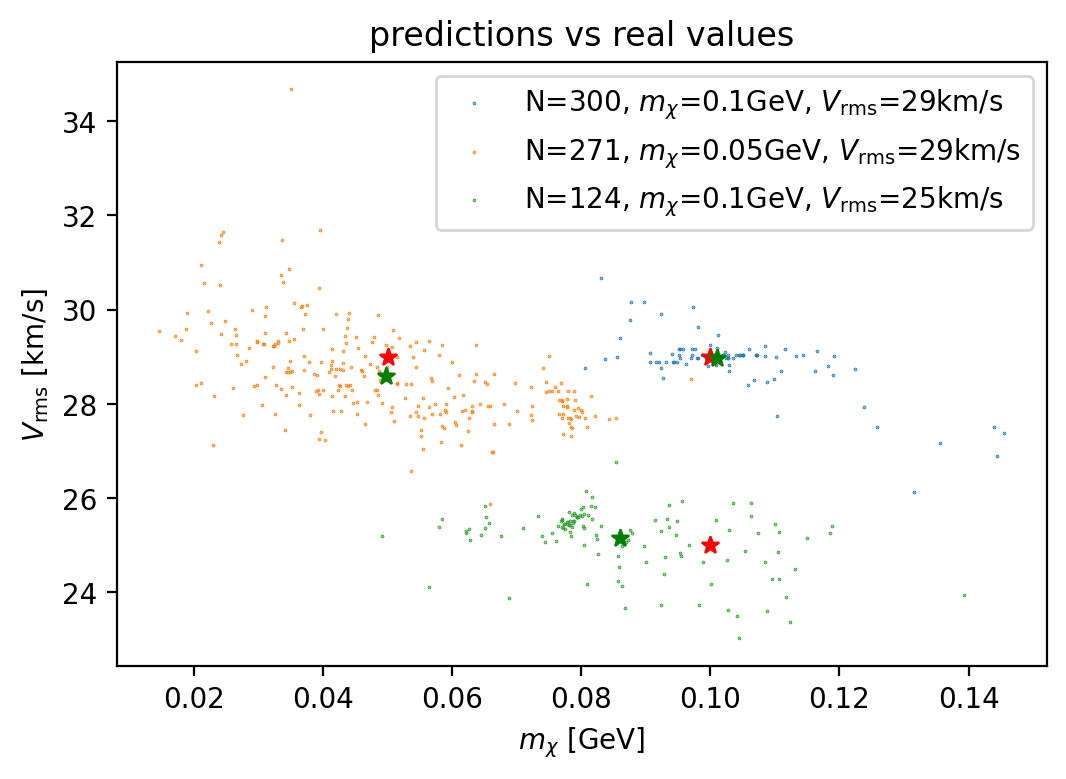

In [ ]:
plt.figure(dpi=200)
for filename in ["m_chi0.10_V_rms29000.npy","m_chi0.05_V_rms29000.npy","m_chi0.10_V_rms25000.npy"]:
    data = np.load(filename, mmap_mode='r')
    m_chi_averaged = np.average(data.T[0])
    V_rms_averaged = np.average(data.T[1])
    m_chi_real = float(filename[5:9])
    V_rms_real = float(filename[-9:-4])
    # plt.scatter(data.T[0], data.T[1]/1000, s=1, label=r"N={}, $m_\chi$={}GeV, $Vrms$={}km/s".format(data.shape[0], m_chi_real, int(V_rms_real/1000)))
    plt.scatter(data.T[0], data.T[1]/1000, s=0.1, label=f"N={data.shape[0]}, $m_\chi$={m_chi_real}GeV, "+r"$V_{\rm rms}$"+f"={int(V_rms_real/1000)}km/s")
    plt.scatter(m_chi_real, V_rms_real/1000, marker="*", c='r')
    plt.scatter(m_chi_averaged, V_rms_averaged/1000, marker="*", c='g')
# plt.colorbar()
# plt.xlim(0, 0.15)
# plt.ylim(20,35)
plt.title("predictions vs real values")
plt.xlabel(r"$m_{\chi}$ [GeV]")
plt.ylabel(r"$V_{\rm rms}$ [km/s]")
plt.legend()
plt.show()